# Logistic Regression

## Import required libraries

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
root_path = Path(".").absolute()
data_path = root_path / "data"
data_path.mkdir(exist_ok=True)

%matplotlib inline

## Classification with Logistic Regression

### Scenario

<p>Assume that you are working for a telecommunications company which is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is more likely to leave the company.</p>

### Know about the Telco Churn data

<p>Telco Churn is a Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer, and it records various demographic and service usage information. Before you can work with the data, you should get it first. Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv">here</a> to access the data.</p>

### About the dataset

<p>We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically, it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.</p>
<p>This dataset provides you information about customer preferences, services opted, personal details, etc. ,which helps you predict customer churn.</p>

## Load Data

In [3]:
file = data_path / "ChurnData.csv"
df = pd.read_csv(file)
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


<p>Let's select some features for modeling. Also, we change the target data type to be an integer, as it is a requirement by the scikit-learn algorithm.</p>

## Data Preprocessing

<p>For this lab, we can use a subset of the fields available to develop out model. Let's assume that the fields we use are <code>tenure</code>, <code>age</code>, <code>address</code>, <code>income</code>, <code>ed</code>, <code>employ</code>, <code>equip</code> and of course <code>churn</code>.</p>

In [4]:
df = df.loc[:, ["tenure", "age", "address", "income", "ed", "employ", "equip", "churn"]]
df["churn"] = df["churn"].astype(int)
df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


<p>For modeling the input fields <code>X</code> and the target field <code>Y</code> need to be fixed. Since that the target to be predicted is <code>churn</code>, the data under this field will be stored under the variable <code>Y</code>. We may use any combination or all of the remaining fields as the input. Store these values in the variable <code>X</code>.</p>

In [5]:
X = np.asarray(df.loc[:, ["tenure", "age", "address", "income", "ed", "employ", "equip"]])
X[0: 5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [6]:
y = np.asarray(df["churn"]) # y must be a 1D Array.
y[0: 5]

array([1, 1, 0, 0, 0])

<p>It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. We may make use of <code>StandardScalar</code> function in the <code>Scikit-Learn</code> library.</p>

In [7]:
X_norm: np.ndarray = StandardScaler().fit(X).transform(X)   # noqa
X_norm[0: 5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Splitting the dataset

<p>The trained model has to be tested and evaluated on data which has not been used during training. Therefore, it is required to separate a part of the data for testing and the remaining for training. For this, we may make use of the <code>train_test_split()</code> function in the <code>Scikit-Learn</code> library.</p>

In [8]:
split_data: list[np.ndarray] = train_test_split(X_norm, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = split_data

## Logistic Regression Classifier modeling

<p>Let's build the model using <code>LogisticRegression</code> from the <code>Scikit-Learn</code> library and fit our model with train dataset.</p>

In [9]:
LR: LogisticRegression = LogisticRegression().fit(X_train, y_train)

<p>Fitting, or in simple terms training, gives us a model that has now learnt from the training data and can be used to predict the output variable. Let's predict the churn parameter for the test dataset.</p>

In [10]:
y_hat: np.ndarray = LR.predict(X_test)
y_hat[: 10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

<p>To understand this prediction, we can also have a look at the prediction probability of data point of the test dataset. Use the function <code>predict_proba</code>, we can get the probability of each class. The first column is the probability of the record belonging to class 0, and second column that of class 1. Note that the class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is most likely.</p>

In [11]:
y_hat_prob: np.ndarray = LR.predict_proba(X_test)
y_hat_prob[: 10]

array([[0.51878155, 0.48121845],
       [0.22539374, 0.77460626],
       [0.78053821, 0.21946179],
       [0.68476137, 0.31523863],
       [0.82116484, 0.17883516],
       [0.30994702, 0.69005298],
       [0.97893094, 0.02106906],
       [0.53468732, 0.46531268],
       [0.50226993, 0.49773007],
       [0.90300796, 0.09699204]])

<p>Since the purpose here is to predict the 1 class more accurately, you can also examine what role each input feature has to play in the prediction of the 1 class. Consider the code below.</p>

Text(0.5, 0, 'Coefficient Value')

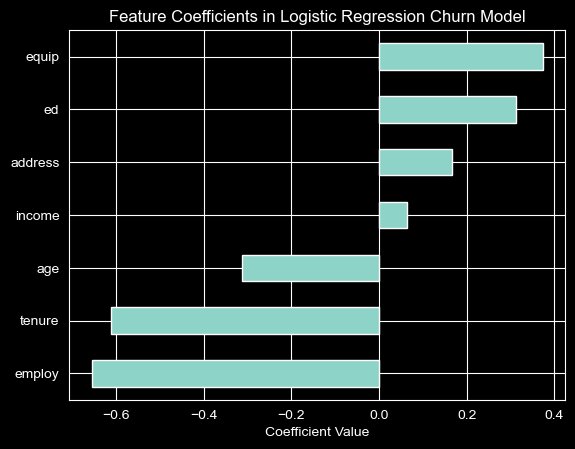

In [12]:
coefficients = pd.Series(LR.coef_[0], index=df.columns[: -1])
coefficients.sort_values().plot(kind="barh")
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")

<p>Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class. Let us examine this with the following exercises.</p>

## Performance Evaluation

<p>Once the predictions have been generated, it becomes prudent to evaluate the performance of the model in predicting the target valuable. Let's evaluate the log-loss value.</p>

### Log Loss

<p>Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.</p>

In [13]:
log_loss(y_test, y_hat_prob)

0.4068959657047867

****
This is the end of the file.
****